In [1]:
# rm(list=ls())
require(data.table)
require(MASS)
require(ggplot2)
# require(foreach)
require(gridExtra)
require(stringr)
require(matrixStats)
require(parallel)
require(abind)
require(rlist)


parallel::detectCores()
## Resizing notebook plot space
options(repr.plot.width=16, repr.plot.height=9)

Loading required package: data.table
Loading required package: MASS
Loading required package: ggplot2
Loading required package: gridExtra
Loading required package: stringr
Loading required package: matrixStats
Loading required package: parallel
Loading required package: abind
Loading required package: rlist
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rlist’”

[1] 40

### 1-D Copula simulation

In [2]:
### Let's simulate a normal and a gamma distribution each.
set.seed(123)
N <- 10000
dt1 <- data.table(id = c(1:N), dist1 = rnorm(N), dist2 = rgamma(N, 1.5, 2))

In [3]:
### What is the current Spearman and Pearson corr values now?
cor(dt1[,2:3], method= "spearman"); cor(dt1[,2:3], method = "pearson");

,dist1,dist2
dist1,1.00000000,-0.01028473
dist2,-0.01028473,1.00000000


,dist1,dist2
dist1,1.00000000,-0.01644105
dist2,-0.01644105,1.00000000


In [6]:
## Since this is a 2-D dataset, let's create the required correlation matrix we want to induce 
corr_mat <- matrix(c(1, 0.9, 0.9, 1), nrow=2)

In [4]:
## We will simulate a multivariate normal distribution with the specific correlation structure; 
### the distribution info is irrelevant

## The 1-D sorting function:
draw1Dcopula <- function(X, corr_mat, print=FALSE){
    mvdat <- t(mvrnorm(n=dim(X)[1], mu=0 * 1:dim(X)[2], Sigma=corr_mat))
    ranks <- t(apply(mvdat, 1, rank, ties.method="first"))
    sorted_X <- apply(X, 2, sort)
    sapply(1:dim(X)[2], function(x) sorted_X[,x][as.vector(ranks[x,])])
}

In [7]:
dt1_post_copula <- data.table(draw1Dcopula(dt1[,2:3], corr_mat))
colnames(dt1_post_copula) <- c("dist1_sorted", "dist2_sorted")

In [8]:
## Compare summary stats
summary(dt1)
summary(dt1_post_copula)

cor(dt1_post_copula, method = "spearman")
cor(dt1_post_copula, method = "pearson")

       id            dist1               dist2         
 Min.   :    1   Min.   :-3.845320   Min.   :0.001239  
 1st Qu.: 2501   1st Qu.:-0.667969   1st Qu.:0.302813  
 Median : 5000   Median :-0.011089   Median :0.583769  
 Mean   : 5000   Mean   :-0.002372   Mean   :0.746234  
 3rd Qu.: 7500   3rd Qu.: 0.673347   3rd Qu.:1.017237  
 Max.   :10000   Max.   : 3.847768   Max.   :4.997249  

  dist1_sorted        dist2_sorted     
 Min.   :-3.845320   Min.   :0.001239  
 1st Qu.:-0.667969   1st Qu.:0.302813  
 Median :-0.011089   Median :0.583769  
 Mean   :-0.002372   Mean   :0.746234  
 3rd Qu.: 0.673347   3rd Qu.:1.017237  
 Max.   : 3.847768   Max.   :4.997249  

,dist1_sorted,dist2_sorted
dist1_sorted,1.0000000,0.8907399
dist2_sorted,0.8907399,1.0000000


,dist1_sorted,dist2_sorted
dist1_sorted,1.0000000,0.8371768
dist2_sorted,0.8371768,1.0000000


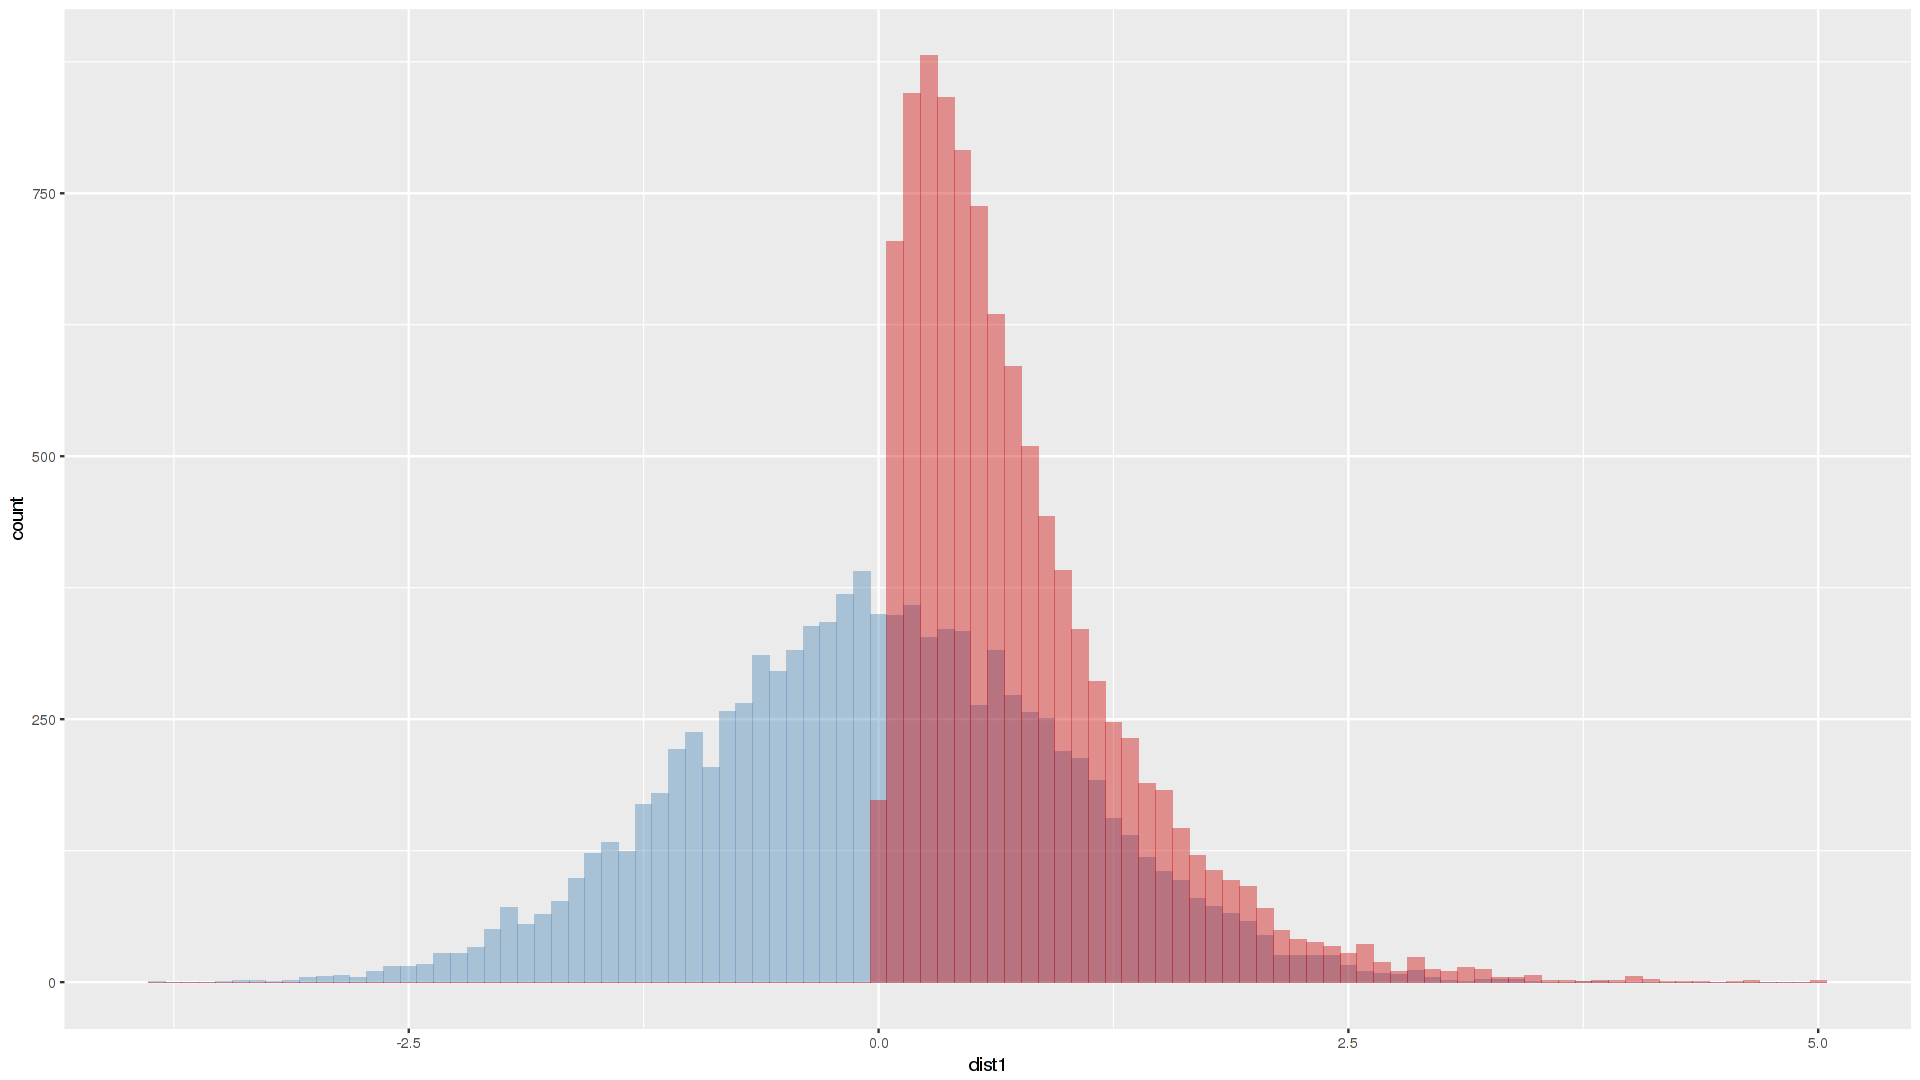

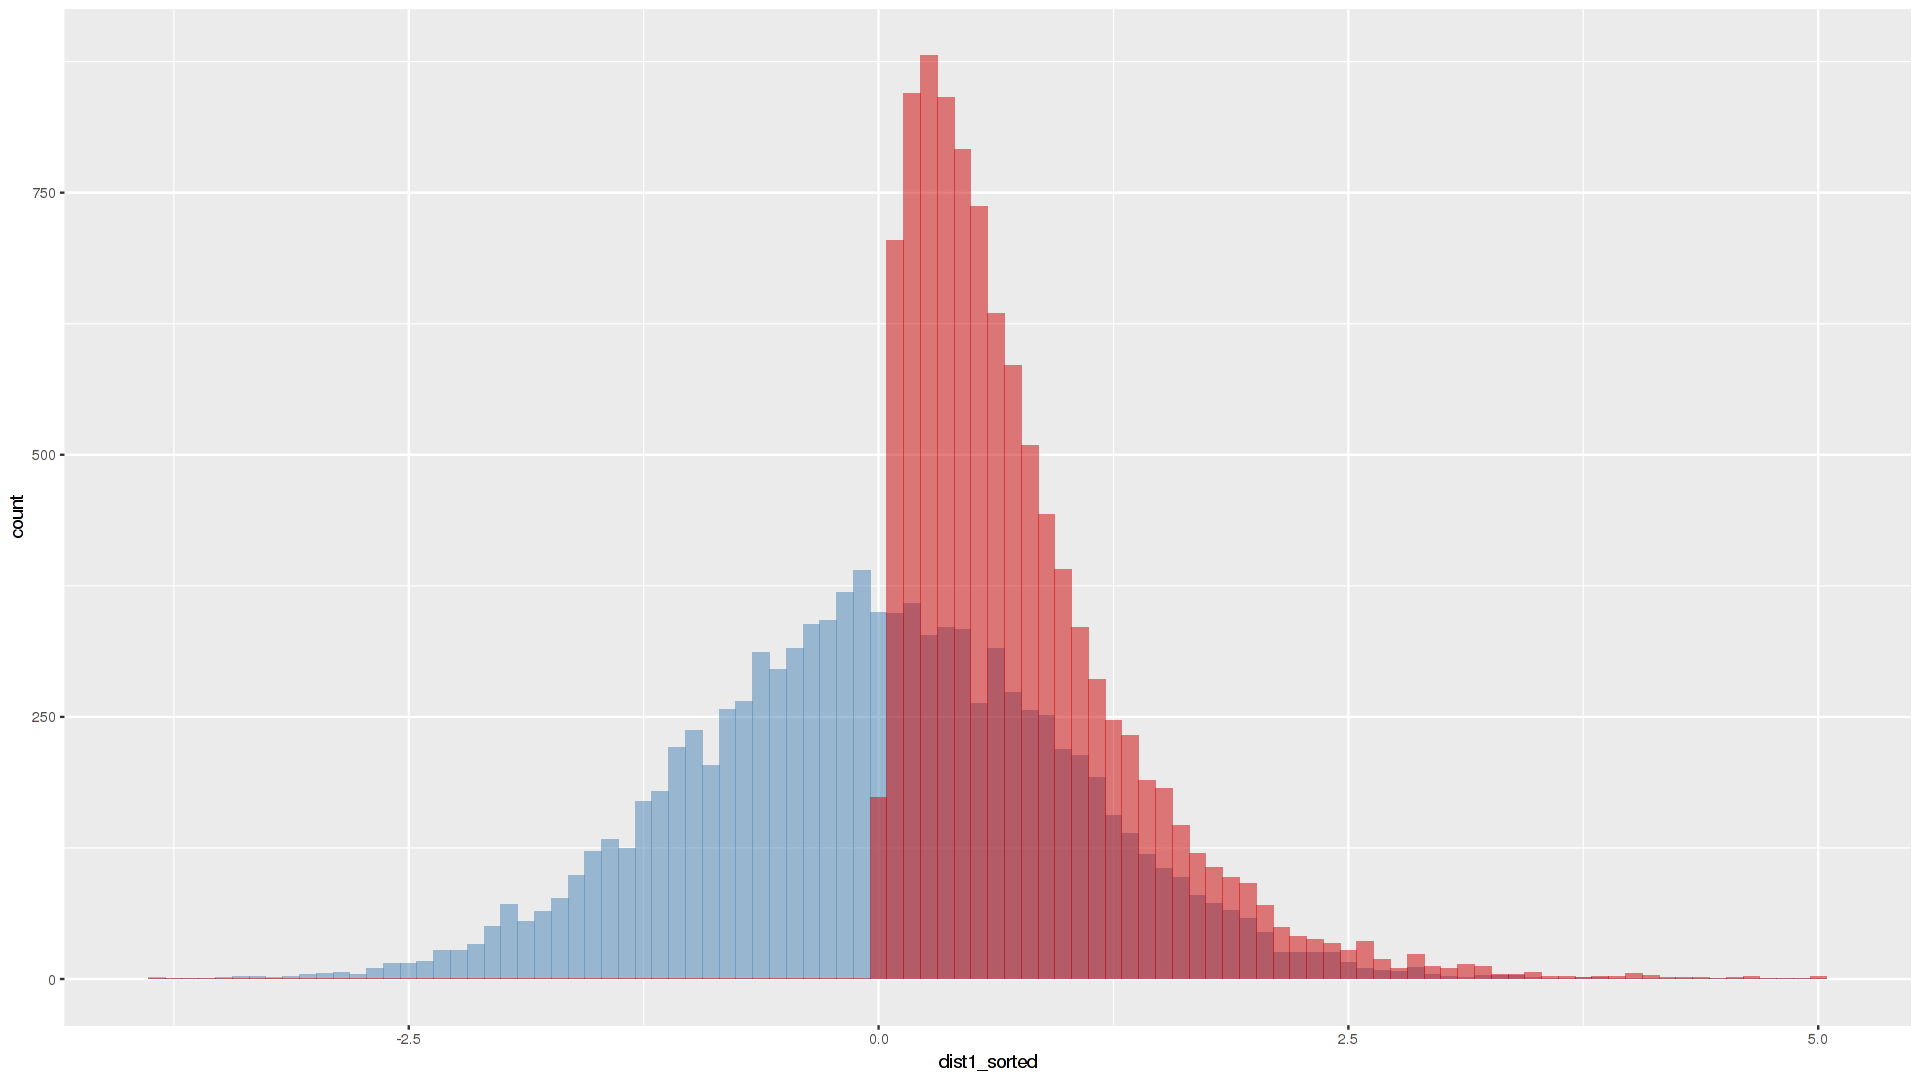

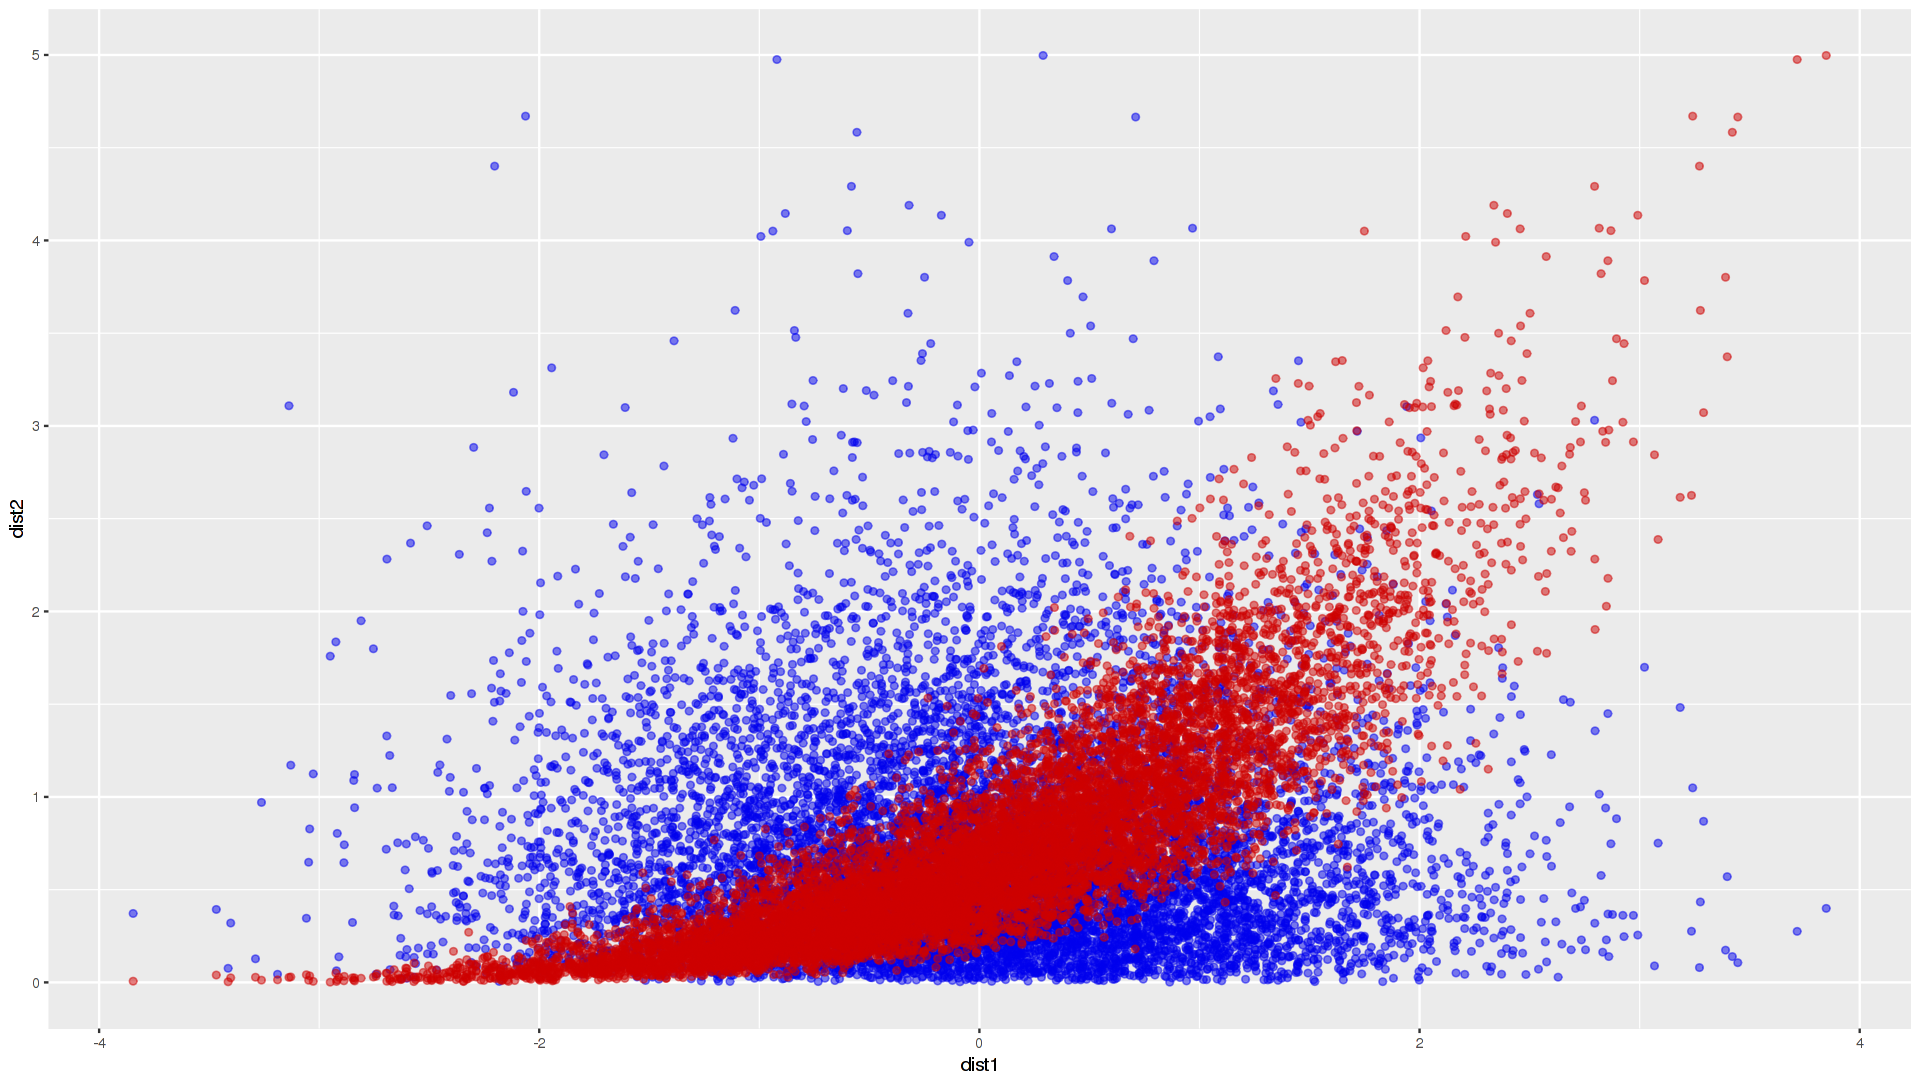

In [9]:
## Some pretty plots

ggplot(dt1) +
	geom_histogram(   aes(x = dist1), bins = 100, fill = "steelblue", alpha = 0.4) +
	geom_histogram(   aes(x = dist2), bins = 100, fill = "red3", alpha = 0.4)  

### Histogram of data after sorting
ggplot(dt1_post_copula) +
	geom_histogram( aes(x = dist1_sorted), bins = 100, fill = "steelblue", alpha = 0.5) +
	geom_histogram( aes(x = dist2_sorted), bins = 100, fill = "red3", alpha = 0.5) 


## Scatters	of distributions before and after
ggplot() +
	geom_point(data = dt1, aes(x = dist1, y=dist2), color = "blue2", fill="steelblue", alpha = .5) +
	geom_point(data = dt1_post_copula, aes(x = dist1_sorted, y=dist2_sorted), color = "red3", fill="red", alpha = .5)
